&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="../DATA/corp_logo.jpg" width='160'>

# Blending and Pasting Images

In computer vision, we often need to place our own image on top of another image or video. Sometimes, we might want to mix images together, like creating a 'highlight' effect instead of just a plain box.

We use what's called **Arithmetic Image Operations** in OpenCV. It's called that because OpenCV does some simple math with the pixels to achieve the final result.

## Blending

It is done through the add-weighted function that uses both images and combine them. we use this formula to blend images (for two images of same sizes):

`new_pixel = α⋅pixel_1 + β⋅pixel_2 + γ`

---

<br>

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Read images
img1 = cv2.imread('../DATA/sun_flowers.jpeg')
img2 = cv2.imread('../DATA/do_not_copy.png')

In [6]:
print ('image1_size: ', img1.shape)
print ('image2_size: ', img2.shape)

image1_size:  (667, 1000, 3)
image2_size:  (225, 224, 3)


In [7]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

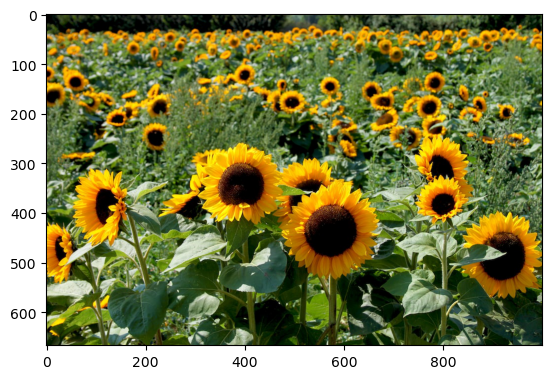

In [8]:
plt.imshow(img1)

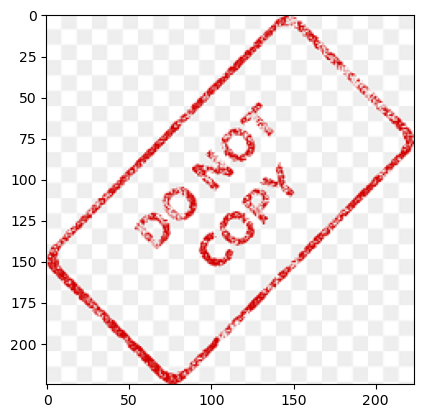

In [9]:
plt.imshow(img2)

### Blending Images of Same Sizes

In [14]:
# Resize the images
img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))

print ('image1_size: ', img1.shape)
print ('image2_size: ', img2.shape)

image1_size:  (1200, 1200, 3)
image2_size:  (1200, 1200, 3)


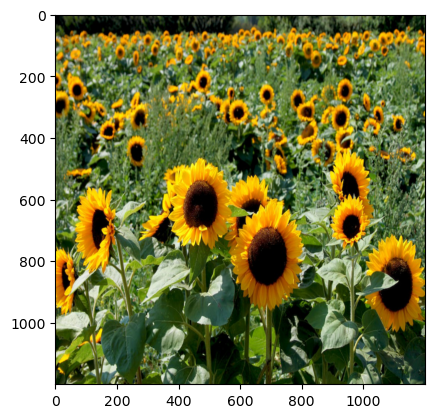

In [11]:
plt.imshow(img1)

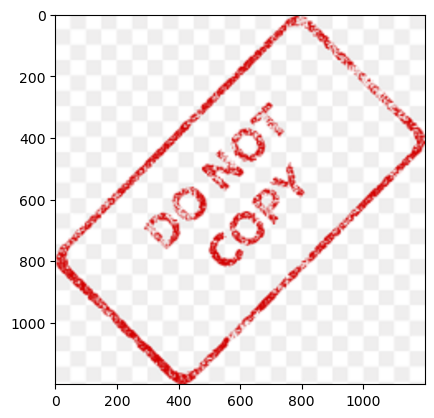

In [12]:
plt.imshow(img2)

In [19]:
# img1 * alfa + img2 * betta + gamma
blended = cv2.addWeighted(src1=img1,alpha=0.5,src2=img2,beta=0.5,gamma=0)

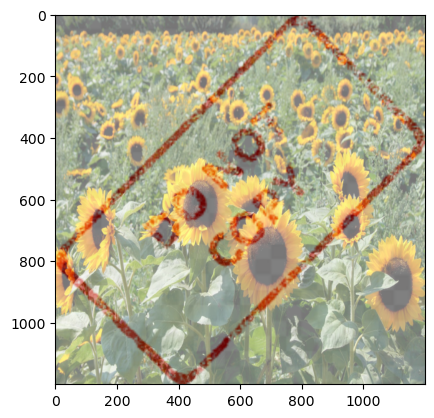

In [20]:
plt.imshow(blended)

### Overlaying Images of Different Sizes
Here we use reassigning the larger image's values to match the smaller image. (There is another option, after blending smaller image with region of interests in larger image, adding in those back in)

In [22]:
# Read images
img1 = cv2.imread('../DATA/sun_flowers.jpeg')
img2 = cv2.imread('../DATA/do_not_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

large_img = img1
small_img = img2

In [23]:
x_offset=0
y_offset=0

In [25]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

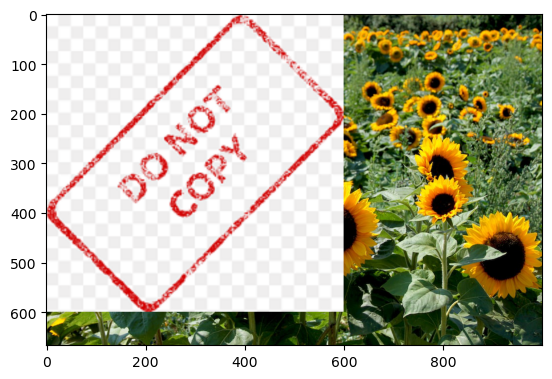

In [26]:
plt.imshow(large_img)

--- 
So far **overlaying** images on top of each other by replacing values of of the larger image with values of the smaller for a desired Region of Interests(ROI) is done. Now, blend or replace part of an image will be explained.


This is what operation we have done so far:
<img src="./images/blending_same_size.png" width= "500">


Now, we want to create a mask from smaller image and **filter** parts of smaller image, then paste in on larger image:
<img src="./images/mask.png" width= "500">


In [41]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# Reload images and resize them again
img1 = cv2.imread('../DATA/sun_flowers.jpeg')
img2 = cv2.imread('../DATA/do_not_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

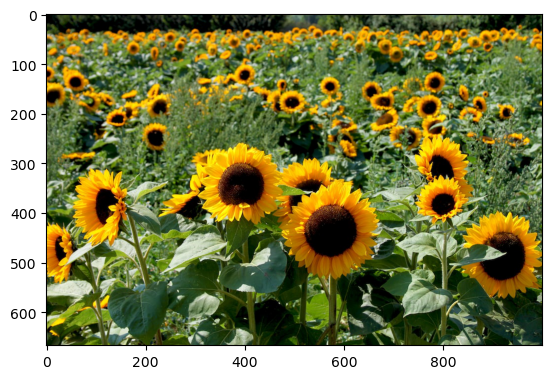

In [50]:
plt.imshow(img1)

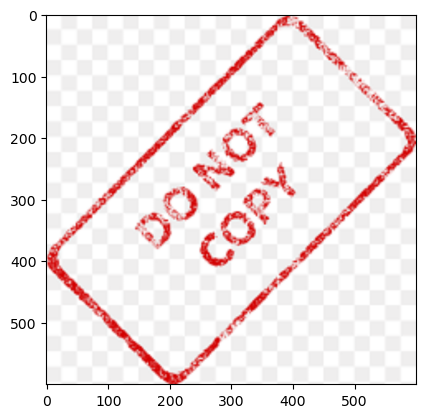

In [51]:
plt.imshow(img2)

In [52]:
# Create region of interest (ROI)
print ('image1_size: ', img1.shape)
print ('image2_size: ', img2.shape)

image1_size:  (667, 1000, 3)
image2_size:  (600, 600, 3)


In [53]:
x_offset = 1000 - 600
y_offset = 667 - 600

In [56]:
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:667,x_offset:1000] # BOTTOM RIGHT CORNER

In [57]:
roi.shape

(600, 600, 3)

In [58]:
# Create the mask of logo and its inverse mask
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [59]:
img2gray.shape

(600, 600)

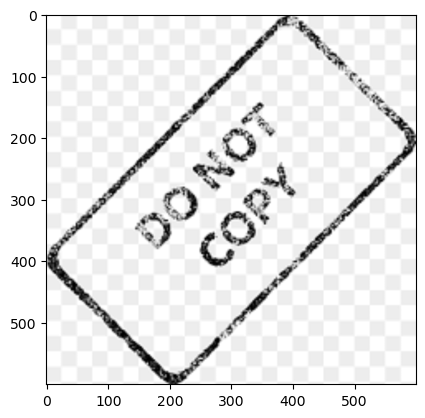

In [61]:
plt.imshow(img2gray, cmap='gray')

In [62]:
mask_inv = cv2.bitwise_not(img2gray)

In [63]:
mask_inv.shape

(600, 600)

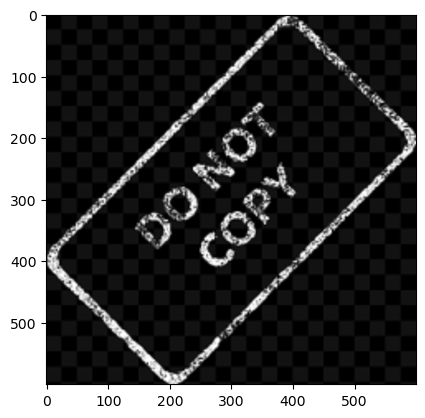

In [64]:
plt.imshow(mask_inv,cmap='gray')

In [65]:
# Convert mask to have 3 channels
white_background = np.full(img2.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [66]:
bk.shape

(600, 600, 3)

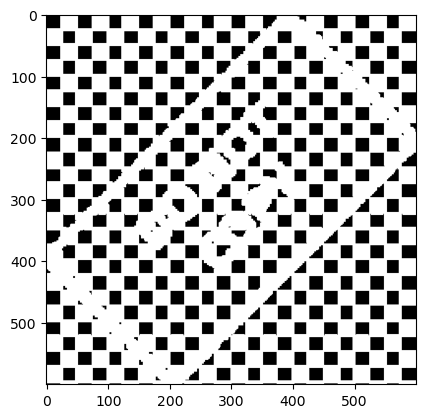

In [67]:
plt.imshow(bk)

In [68]:
# Grab original fore-ground image and place on top of mask
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

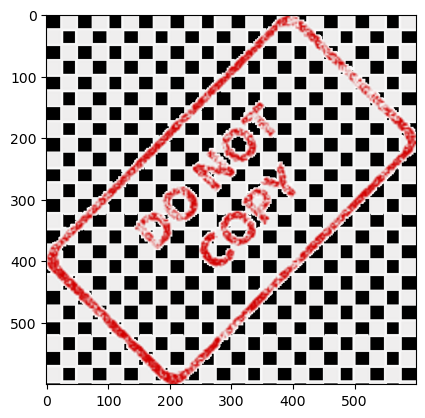

In [69]:
plt.imshow(fg)

In [70]:
fg.shape

(600, 600, 3)

In [71]:
# get ROI and blend in the mask with ROI
final_roi = cv2.bitwise_or(roi,fg)

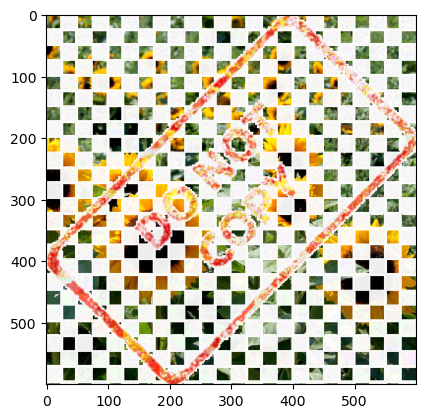

In [72]:
plt.imshow(final_roi)

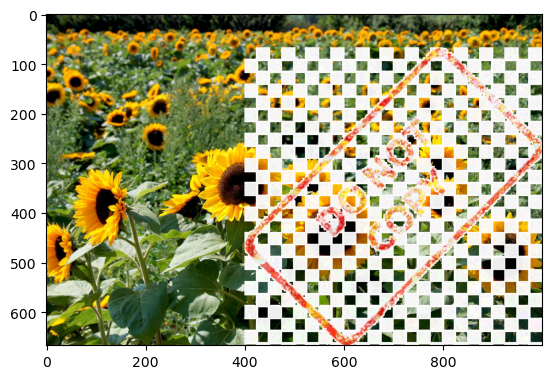

In [73]:
# Add in the rest of the image
large_img = img1
small_img = final_roi

large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)

Check out these documentation examples for more information:

1. https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075
2. https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
3. https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html